### [MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv](https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data)
Columns: 
- __month__: The month in which subway trains delayed is being calculated (yyyy-mm-dd).
- __division__: The A Division (numbered subway lines), B Division (lettered subway lines) and systemwide.
- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, J, Z, L, N, Q, R, W, S 42nd, S Rock, S Fkln).
- __day_type__: Represents weekday as 1 and weekend as 2.
- __reporting_category__: The six categories that delays are reported under: Infrastructure & equipment, Crew availability, Police & medical, External Factors, Operating conditions, Planned ROW work. 
- __subcategory__: The sub-categories that fall under the definition of Delays: Braking; Door-Related; Fire, Smoke, Debris; Inclement Weather; Crew Availability; Insufficient Supplement Schedule; Propulsion; Public Conduct, Crime, Police Response; Rail and Roadbed; Persons on Roadbed; Service Delivery; Sick/Injured Customer; Train Brake Activation - Cause Unknown; Subways Maintenance; Work Equipment; Capital Work - Other Planned ROW; External Debris on Roadbed; External Agency or Utility; Capital Work - Other Planned ROW; Other – CE; Other – Sig; Other Infrastructure; Other Internal Disruptions.
- __delays__: The number of train delays per category and time period.

# Data Analysis

In [167]:
line_colors = {
    "1": "red",
    "2": "red",
    "3": "red",
    "4": "green",
    "5": "green",
    "6": "green",
    "7": "purple",
    "A": "blue",
    "C": "blue",
    "E": "blue",
    "B": "orange",
    "D": "orange",
    "F": "orange",
    "G": "lightgreen",
    "GS": "lightgreen",
    "M": "orange",
    "J": "brown",
    "Z": "brown",
    "JZ": "brown",
    "L": "gray",
    "N": "gold",
    "Q": "gold",
    "R": "gold",
    "W": "gold",
    "S Fkln": "lightgray",
    "S Rock": "lightgray",
}

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delays_file = "MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv"
df = pd.read_csv(delays_file)

# replace missing subcategories with reporting_category
df['subcategory'] = df['subcategory'].fillna(df['reporting_category'])

# drop
df = df.drop(columns=['division', 'reporting_category'])

In [169]:

# pivot the delay subcategory rows into columns
df = df.pivot(index=['month', 'day_type', 'line'], columns='subcategory', values='delays').fillna(0)
df['total_delays'] = df.sum(axis=1)

# sum the delays
line_grouped = df.groupby(['line']).sum().reset_index()

# sort by delays
line_grouped = line_grouped.sort_values('total_delays', ascending=False)
line_grouped.set_index('line', inplace=True)

#drop total_delays now
line_grouped = line_grouped.drop(columns=['total_delays'])

line_grouped


subcategory,Braking,Capital Work - Other Planned ROW,Crew Availability,Door-Related,External Agency or Utility,External Debris on Roadbed,"Fire, Smoke, Debris",Inclement Weather,Insufficient Supplement Schedule,Operating Conditions,...,Propulsion,"Public Conduct, Crime, Police Response",Rail and Roadbed,Service Delivery,Service Management,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Train Brake Activation - Cause Unknown,Work Equipment
line,,,,,,,,,,,,,,,,,,,,,
N,2684.0,3050.0,28351.0,3266.0,424.0,1806.0,2408.0,2380.0,1067.0,24343.0,...,2686.0,18933.0,6465.0,2838.0,0.0,2779.0,191.0,30455.0,1222.0,3087.0
A,1526.0,4196.0,28175.0,1874.0,8238.0,815.0,1933.0,1028.0,317.0,26109.0,...,1913.0,14853.0,4624.0,3177.0,0.0,3601.0,48.0,32163.0,930.0,1250.0
F,968.0,7123.0,24154.0,480.0,1197.0,542.0,1699.0,614.0,444.0,15984.0,...,683.0,12063.0,6842.0,1956.0,0.0,3389.0,3152.0,34155.0,823.0,1684.0
6,1837.0,1458.0,15132.0,2324.0,374.0,1320.0,2114.0,599.0,195.0,31057.0,...,1245.0,28541.0,4879.0,2814.0,194.0,7127.0,46.0,14902.0,836.0,1303.0
2,1406.0,2684.0,14374.0,867.0,915.0,1097.0,1998.0,1050.0,1512.0,29759.0,...,977.0,15944.0,4371.0,3202.0,0.0,5268.0,50.0,19592.0,1190.0,995.0
E,824.0,7661.0,14382.0,560.0,671.0,597.0,1620.0,11.0,500.0,14467.0,...,741.0,10613.0,5727.0,1877.0,0.0,3557.0,3580.0,32682.0,1334.0,1594.0
Q,1516.0,435.0,23194.0,1784.0,389.0,1571.0,1922.0,1728.0,515.0,17736.0,...,1419.0,13145.0,3662.0,2201.0,0.0,2350.0,54.0,16745.0,824.0,1312.0
D,981.0,1199.0,25510.0,1061.0,492.0,698.0,1322.0,822.0,474.0,14434.0,...,1198.0,12020.0,3156.0,2193.0,0.0,2053.0,53.0,20915.0,936.0,2612.0
4,1681.0,1088.0,14194.0,750.0,459.0,811.0,2026.0,452.0,436.0,18199.0,...,867.0,15878.0,3747.0,2442.0,0.0,5305.0,37.0,12136.0,962.0,1014.0


Text(0.5, 0, 'Subway Line')

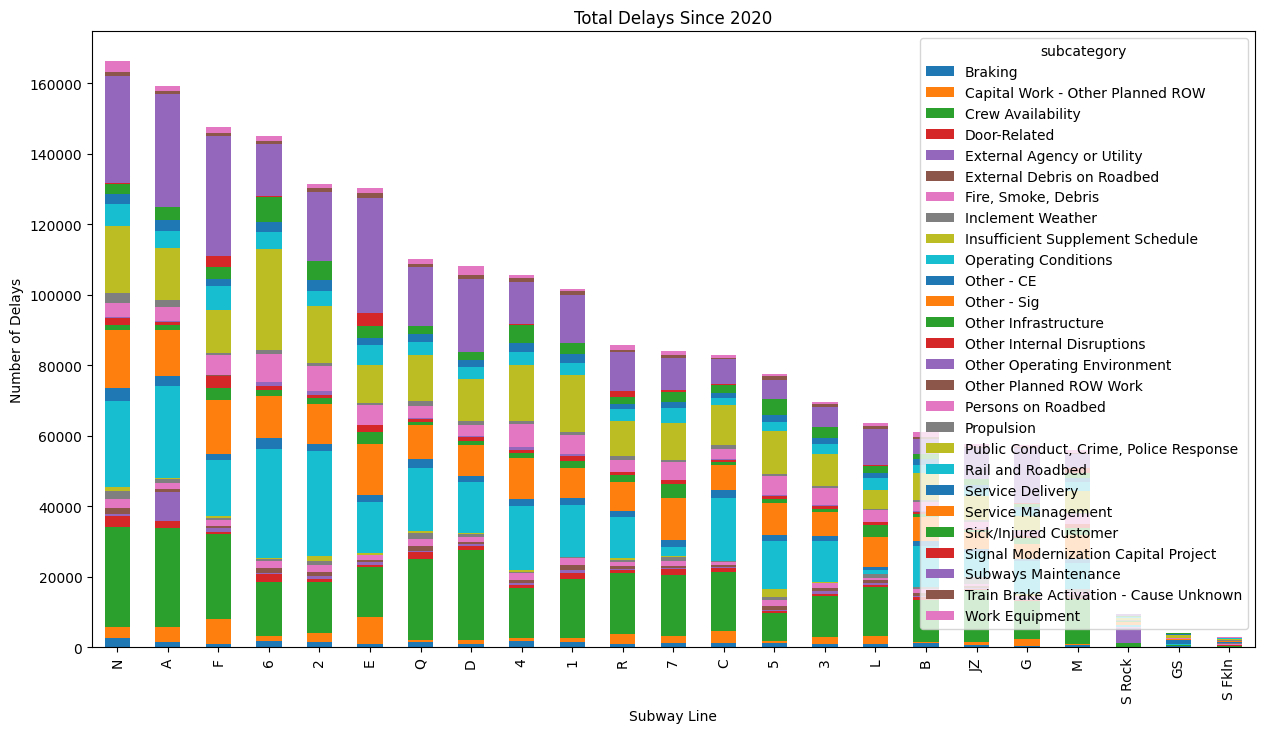

In [170]:
# Plot a stacked bargraph
fig, ax = plt.subplots(figsize=(15, 8))

line_grouped.plot(kind='bar', stacked=True, ax=ax)

plt.title("Total Delays Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Subway Line")